In [1]:
%matplotlib inline
import numpy as np
import config
import matplotlib
matplotlib.use('nbagg')

import plotting_helpers as plots
import utility_functions as utils
import csd_profile as CSD
from KCSD import KCSD2D

/home/chaitanya/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


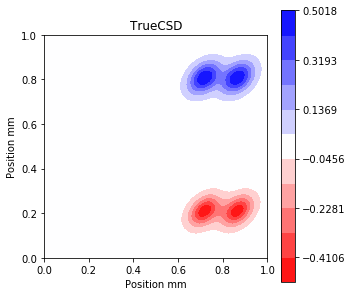

In [2]:
# Lets say we create a random CSD source
csd_profile = CSD.gauss_1d_mono #Type of the CSD Source
csd_profile = CSD.gauss_2d_small
config.dim = 2
csd_at, true_csd = utils.generate_csd(csd_profile, seed=15)
plots.show_csd(csd_at, true_csd)

(100, 100)
[ 0.5  0.5  0.5 ...,  1.5  1.5  1.5]
[-0.7        -0.68989899 -0.67979798 ...,  0.27979798  0.28989899  0.3       ]


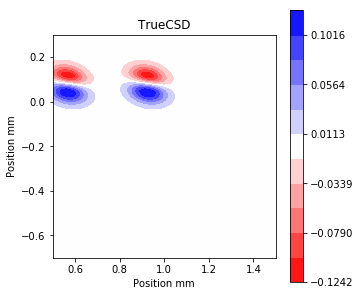

In [3]:
csd_at_b =  np.mgrid[0.5:1.5:100j, -0.7:0.3:100j]
csd_at_b, true_csd_b = utils.generate_csd(csd_profile, csd_at_b, seed=0)
plots.show_csd(csd_at_b, true_csd_b)
print(true_csd_b.shape)
print(csd_at_b[0, :, :].flatten())
print(csd_at_b[1, :, :].flatten())


('Shape of the ele_pos array: ', (100, 2))
('Number of electrodes: ', 100)


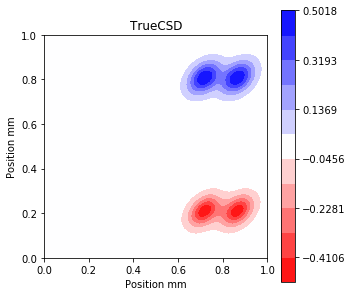

In [4]:
 #Lets add some electrodes which span the CSD space                                                                                                                                                                                                    
num_ele, ele_pos = utils.generate_electrodes()
plots.show_csd(csd_at, true_csd, show_ele=ele_pos)
print('Shape of the ele_pos array: ', ele_pos.shape)
print('Number of electrodes: ',ele_pos.shape[0])

(2, 100, 100)
('Shape of the ele_pos array: ', (91, 2))
('Number of electrodes: ', 91)


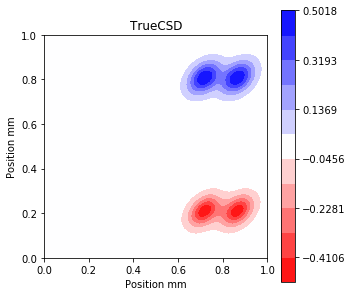

In [11]:
# Lets emulate the case when some of the electrodes are broken / used for stimulation
ele_seed = np.random.RandomState(13)
ele_fail = ele_seed.choice(num_ele, 3, replace=False)
print(csd_at.shape)
ele_pos = np.delete(ele_pos, ele_fail, axis=0)
plots.show_csd(csd_at, true_csd, show_ele=ele_pos)
print('Shape of the ele_pos array: ', ele_pos.shape)
print('Number of electrodes: ',ele_pos.shape[0])

(97, 1)

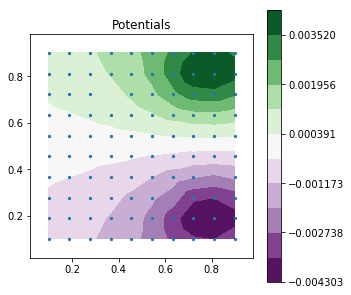

In [6]:
# Lets compute the potential recorded by these electrodes due to the CSD
r = 10.
sigma = 1.
pots = utils.calculate_potential(csd_at, true_csd, ele_pos, r, sigma)
plots.show_pot(ele_pos, pots)
pots.shape

(100, 100)
0.47772988251


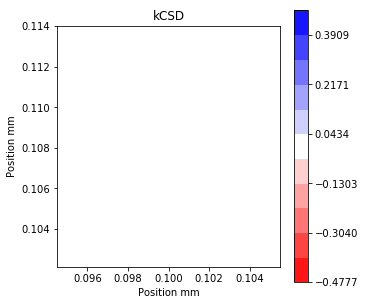

In [9]:
####TODO temporal illustration here
#Lets do KCSD!
k = KCSD2D(ele_pos, pots, sigma=1., h=10., n_src_init=1000, R_init=0.08) 
est_csd = k.values()[:,:,0]
est_pos = k.estm_x
print(est_pos.shape)
plots.show_csd(est_pos, est_csd, show_ele=ele_pos, show_kcsd=True)
print np.max(est_csd)


('Cross validating R (all lambda) :', 0.029999999999999999)
('Cross validating R (all lambda) :', 0.040000000000000001)
('Cross validating R (all lambda) :', 0.050000000000000003)
('Cross validating R (all lambda) :', 0.060000000000000005)
('Cross validating R (all lambda) :', 0.070000000000000007)
('Cross validating R (all lambda) :', 0.080000000000000016)
('Cross validating R (all lambda) :', 0.090000000000000011)
('Cross validating R (all lambda) :', 0.10000000000000001)
('R, lambda :', 0.10000000000000001, 1.0000000000000001e-05)


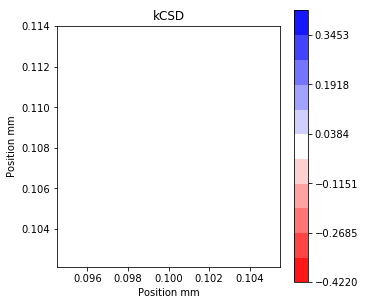

In [8]:
k.cross_validate(Rs=np.arange(0.03, 0.10, 0.01), lambdas=np.logspace(15,-25, 35))
est_csd = k.values()
est_pos = k.estm_x
plots.show_csd(est_pos, est_csd[:,:,0], show_ele=ele_pos, show_kcsd=True)